# Calculations for Missile Launch Acceleration
Last update: 24 Sept 2017

**Abstract:** This notebook will calculate the launch acceleration of missile launched horizontally from an aircraft.

**Introduction:** The launch acceleration is an important parameter for the arming environment of safe and arm devices.  This notebook will calculate the launch acceleration for a rail launched missile.  Acceleration at a basic level is force divided by mass.  The force is supplied by the rocket motor, which is reduced by drag and the mass is the weight of the missile.  This notebook will calculate the drag over a range of altitudes and Mach numbers.

**Array variables used:**
- alt: altitude array, 0 to 50,000 meters
- rho: pressure array in Pa, as a function of altitude
- T: temperature array in C,  as a function of altitude
- air_density: air density array in kg/m^3, as a function of altitude

**Scope:** These calculations are primarily for rail launched missile.  Rocket motor thrust is considered a step function at t=0.  Drag coefficient versus mach number is a educated guess. Calculations cover the following ranges: Altitude can range from 0 to 50,000 meters and mach number can range from .25 to 2.  Standard dry air is assumed. Some inputs are in inches and pounds and these are converted to the International System of Units (SI) (kg, m & s).

**Analysis method:**  The calculations proceed as follows:
- find the density of air as a function of altitude
- calculate the drag force
- calculate the acceleration and convert to gravity units
- plot the results


## Density of air
The [density of air](https://en.wikipedia.org/wiki/Density_of_air) ρ (Greek: rho) (air density) is the mass per unit volume of Earth's atmosphere. Air density, like air pressure, decreases with increasing altitude. It also changes with variation in temperature and humidity. At sea level and at 15°C air has a density of approximately 1.225 kg/m^3.

- $p_0$ = sea level standard atmospheric pressure, 101.325 kPa
- $T_0$ = sea level standard temperature, 288.15 K
- R = ideal (universal) gas constant, 8.31447 J/(mol·K)
- M = molar mass of dry air, 0.0289644 kg/mol

Density can then be calculated according to a molar form of the ideal gas law:

$\rho = \frac{p*M}{R*T}$

where:
- M = molar mass
- R = ideal gas constant
- T = absolute temperature
- $\rho$ = absolute pressure

## Earth's atmosphere
The Earth's atmosphere is an extremely thin sheet of air extending from the surface of the Earth to the edge of space. If the Earth were the size of a basketball, a tightly held pillowcase would represent the thickness of the atmosphere. Gravity holds the atmosphere to the Earth's surface. Within the atmosphere, very complex chemical, thermodynamic, and fluid dynamics effects occur. The atmosphere is not uniform; fluid properties are constantly changing with time and place. We call this change the weather.

Standard Atmosphere: $p_0 = 101.325 kPa$, $T_0 = 288.15 K$, $\rho_0 = 1.225 kg/m^3$

The [model](https://www.grc.nasa.gov/www/k-12/airplane/atmosmet.html) has three zones with separate curve fits for the troposphere, the lower stratosphere, and the upper stratosphere.

### Troposphere
The troposphere runs from the surface of the Earth to 11,000 meters. In the troposphere, the temperature decreases linearly and the pressure decreases exponentially. The rate of temperature decrease is called the lapse rate. For the temperature T and the pressure p, the metric units curve fits for the troposphere are:

$T = 15.04 - .00649 * h$

$p = 101.29 * [\frac{T + 273.1}{288.08}]^{5.256}$

where the temperature is given in Celsius degrees, the pressure in kilo-Pascals,and h is the altitude in meters.

### Lower Stratosphere
The lower stratosphere runs from 11,000 meters to 25,000 meters. In the lower stratosphere the temperature is constant and the pressure decreases exponentially. The metric units curve fits for the lower stratosphere are:

$T = -56.46$

$p = 22.65*e^{1.73-.000157*h}$

### Upper Stratosphere
The upper stratosphere model is used for altitudes above 25,000 meters. In the upper stratosphere the temperature increases slightly and the pressure decreases exponentially. The metric units curve fits for the upper stratosphere are:

$T = -131.21 + .00299 * h$

$p = 2.488 * [\frac{T + 273.1}{216.6}]^{-11.388}$

In [16]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [17]:
alt = np.linspace(0, 50000, num=30, endpoint=True)
T = np.zeros(len(alt))  # temperature, units of degrees C
rho = np.zeros(len(alt))   # pressure as a function of temperature, units of kPa

for i in range(len(alt)):
    if alt[i] <= 11000:  # The troposphere runs from the surface of the Earth to 11,000 meters.
        T[i] =  15.04 - .00649 * alt[i]
        rho[i] = 101.29 * ((T[i] + 273.1)/288.08)**5.256
    if (alt[i] > 11000) and (alt[i] <= 25000): #The lower stratosphere runs from 11,000 meters to 25,000 meters
        T[i] = -56.46  # a constant
        rho[i] = 22.65 * np.exp(1.73 - .000157 * alt[i])
    if alt[i] > 25000:  # The upper stratosphere model is used for altitudes above 25,000 meters.
        T[i] = -131.21 + 0.00299 * alt[i]
        rho[i] = 2.488 * ((T[i] + 273.1)/ 216.6)**-11.388
# convert rho from kPa to Pa
rho *= 1000

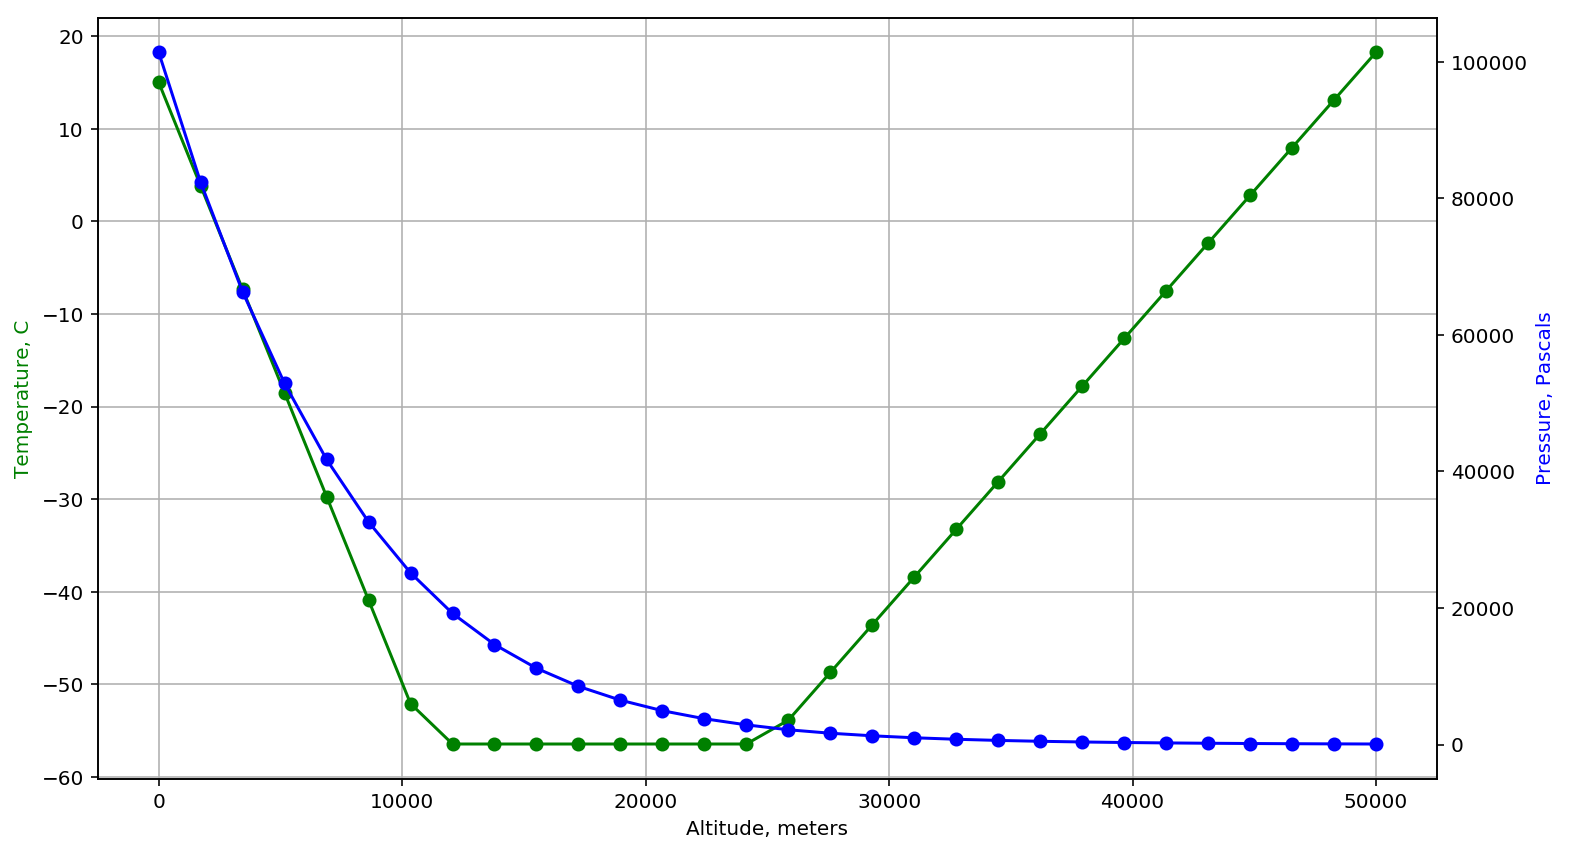

In [18]:
# plot the temperature and pressure vs altitude
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alt, T,'g-o')
ax2.plot(alt, rho,'b-o')
ax1.set_xlabel('Altitude, meters')
ax1.set_ylabel('Temperature, C', color='g')
ax2.set_ylabel('Pressure, Pascals', color='b')
ax1.grid()  # put grid marks on temperature axis
plt.show()

### Molar mass of dry air
In chemistry, the molar mass M is a physical property defined as the mass of a given substance (chemical element or chemical compound) divided by the amount of substance. The base SI unit for molar mass is kg/mol. However, for historical reasons, molar masses are almost always expressed in g/mol. The molecular weight (or molar mass) of a substance is the mass of one mole of the substance, and can be calculated by summarizing the molar masses of all the atoms in the molecule.

**Components in Dry Air:**  Air is a mixture of several gases, where the two most dominant components in dry air are oxygen and nitrogen. Oxygen has a molar mass of 16 g/mol and nitrogen has a molar mass of 14 g/mol. Since both of these elements are diatomic in air - O2 and N2, the molar mass of oxygen is 32 g/mol and the molar mass of nitrogen is 28 g/mol.  The average molar mass is equal to the sum of the mole fractions of each gas multiplied by the molar mass of that particular gas:

$M_{mixture} = (x_1*M_1 + ......+ x_n*M_n)$

where
- $x_i$ = mole fractions of each gas
- $M_i$ = the molar mass of each gas


| Components in Dry Air | Volume Ratio compared to Dry Air | Molar Mass M (g/mol) |
|-----------------------|----------------------------------|----------------------|
| Oxygen | 0.2095 | 32.00 |
| Nitrogen | 0.7809 |28.02 |
| Carbon dioxide | 0.0003 | 44.01 |
| Hydrogen | 0.0000005 | 2.02 |
| Argon | 0.00933 | 39.94 |
| Neon | 0.000018 | 20.18 |
| Helium | 0.000005 | 4.00 |
| Krypton | 0.000001 | 83.8 |
| Xenon | 0.09x10-6 | 131.29 |
The average molar mass of dry air is 28.97 g/mol.

In [19]:
# make a dataframe for the constituents of dry air
df = pd.DataFrame(columns=['element','Volume Ratio','Molar Mass'])
df.loc[0] = ['Oxygen',0.2095,32.00]
df.loc[1] = ['Nitrogen',0.7809,28.02]
df.loc[2] = ['Carbon dioxide',0.0003,44.01]
df.loc[3] = ['Hydrogen',0.0000005,2.02]
df.loc[4] = ['Argon',0.00933,39.94]
df.loc[5] = ['Neon',0.000018,20.18]
df.loc[6] = ['Helium',0.000005,4.00]
df.loc[7] = ['Krypton',0.000001,83.8]
df.loc[8] = ['Xenon',0.09e-6,131.29]

molar_mass_air = 0
for i in range(len(df)):
    molar_mass_air += df.loc[i,'Volume Ratio']*df.loc[i,'Molar Mass']

molar_mass_air /= 1000 # convert to kg/mol
print('molar mass of dry air: {:f} kg/mol'.format(molar_mass_air))

molar mass of dry air: 0.028971 kg/mol


### The ideal gas law
The ideal gas law, also called the general gas equation, is the equation of state of a hypothetical ideal gas. It is a good approximation of the behavior of many gases under many conditions, although it has several limitations. It was first stated by Émile Clapeyron in 1834 as a combination of the empirical Boyle's law, Charles's law and Avogadro's Law. The ideal gas law is often written as

$PV=nRT$

where:
- P is the pressure of the gas
- V is the volume of the gas
- n is the amount of substance of gas (in moles)
- R is the ideal, or universal, gas constant, equal to the product of the Boltzmann constant and the Avogadro constant
- T is the absolute temperature of the gas

This form of the ideal gas law is very useful because it links pressure, density, and temperature in a formula independent of the quantity of the considered gas.

$density = \frac{molar mass*P}{R*T}$

At sea level and at 15 °C air has a density of approximately $1.225 \frac{kg}{m^3}$

In [37]:
# density of air at a given pressure and temperature
p = 101.325 # absolute pressure at sea level, kilo-Pascals
p *= 1000  # convert to Pa
t = 15 # temperature, units of C, need to convert to K when using in equations
# ideal gas constant
k = 1.38064852e-23 # Boltzmann constant, J/T, relates the average kinetic energy in a gas with the temperature of the gas
Na = 6.022140857e23 # Avogadro constant, 1/mol
R = k*Na  # 8.3144598 # ideal gas constant, J/(mol⋅T)
d = p*molar_mass_air/(R*(t+273.1))
print('air density at {:,.0f} pa and {:.0f}C is {:.3f} kg/m^3'.format(p,t,d))

air density at 101,325 pa and 15C is 1.225 kg/m^3


### Plot air density as a function of altitude

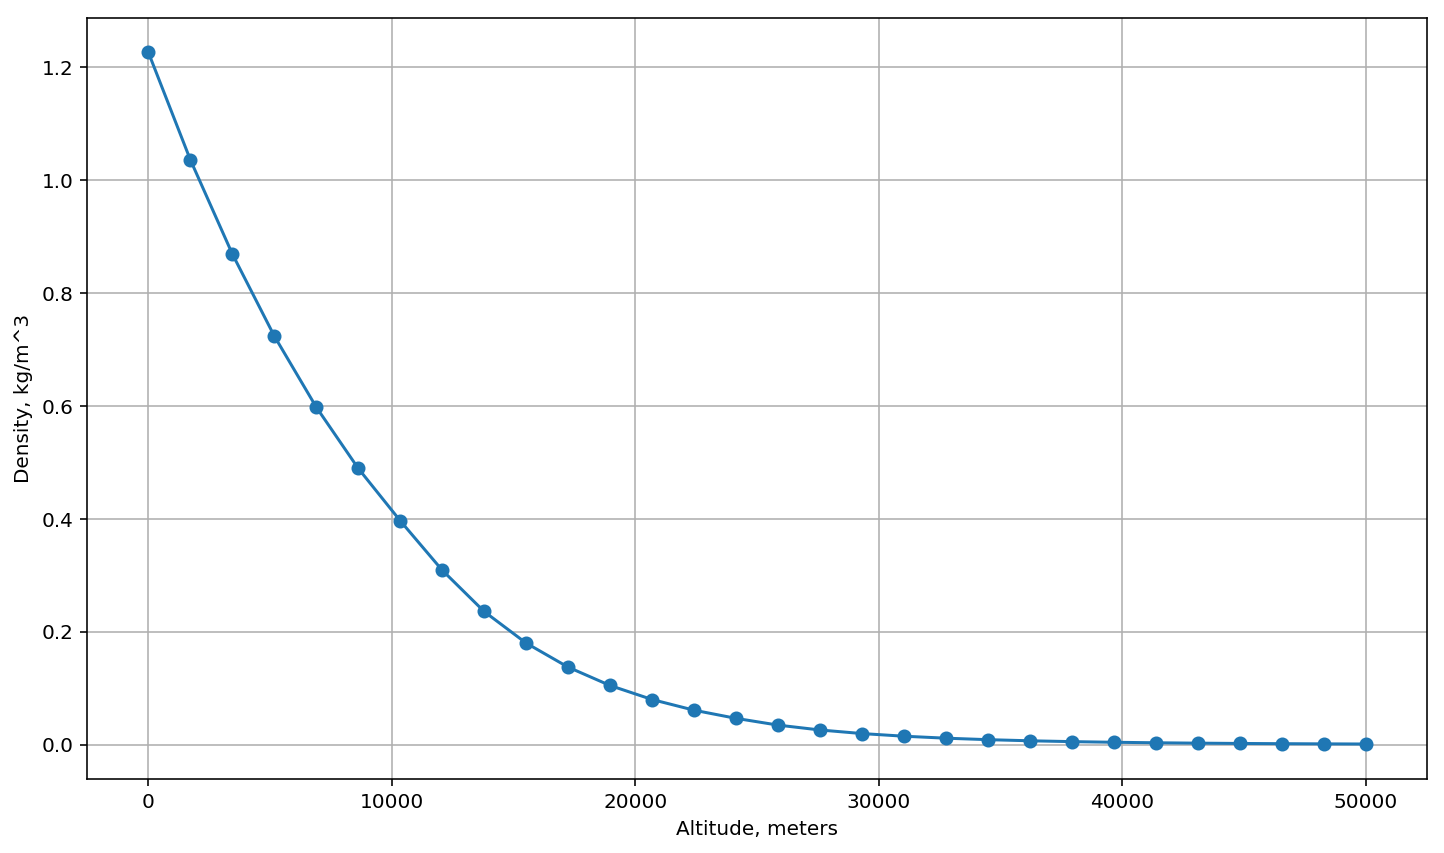

In [38]:
air_density = (rho)*molar_mass_air/(R*(T+273.1))
plt.plot(alt, air_density,'-o')
plt.xlabel('Altitude, meters')
plt.ylabel('Density, kg/m^3')
plt.grid()
plt.show()

### Inputs to missile acceleration model

In [74]:
motor_thrust_lbs = 5000  # Rocket motor thrust, pounds force, try 8500
msl_weight_lbs = 783 # Weight of the missile in pounds
d_in = 10 # diameter of the missile, inches

# convert to SI units
motor_thrust = motor_thrust_lbs * 4.448221  # convert pounds force to Netwons
msl_weight = msl_weight_lbs * 0.453592  #convert to kg
area = np.pi*(d_in*0.0254)**2  # reference area, meters^2

drag_coef = np.array([ 0.25, 0.26, 0.27,  0.3,  0.35 ,  0.4,  0.42, 0.415, 0.4, 0.375, 0.35, 0.325])
mach_num = np.array([ 0.2, 0.36, 0.52, 0.69, 0.85, 1.018, 1.18, 1.345, 1.50, 1.67, 1.836, 2.])

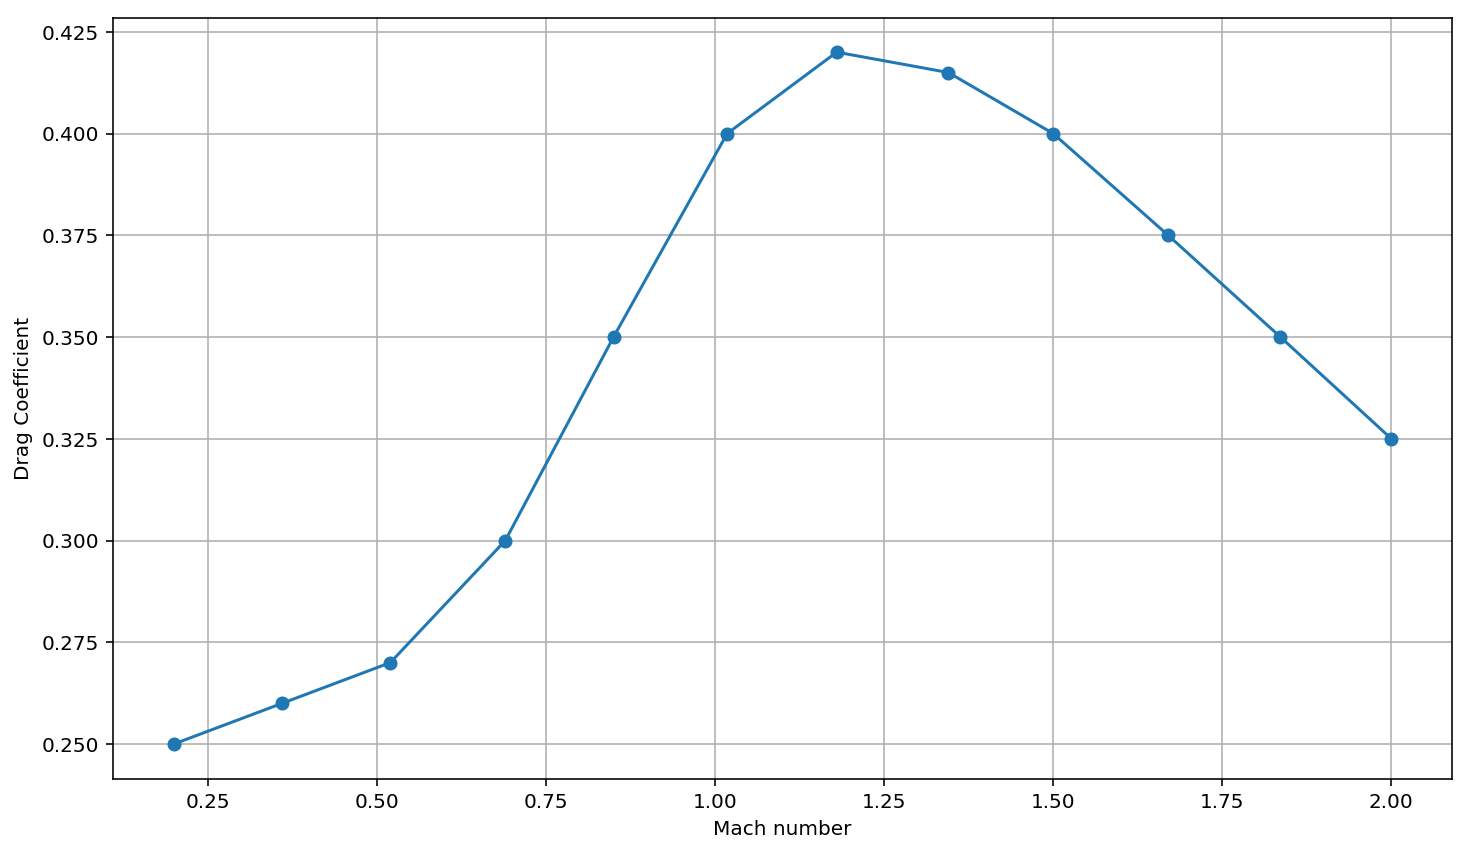

In [66]:
# plot drage coefficients
plt.plot(mach_num, drag_coef,'-o')
plt.xlabel('Mach number')
plt.ylabel('Drag Coefficient')
plt.grid()
plt.show()

## Calculate drag force
In fluid dynamics, the [drag equation](https://en.wikipedia.org/wiki/Drag_equation) is a formula used to calculate the force of drag experienced by an object due to movement through a fully enclosing fluid. The formula is accurate only under certain conditions: the objects must have a blunt form factor and the system must have a large enough Reynolds number to produce turbulence behind the object. The equation is:

$F_{D}\,=\,{\tfrac  12}\,\rho \,u^{2}\,C_{D}\,A$

- $F_{D}$ is the drag force, which is by definition the force component in the direction of the flow velocity
- $\rho$  is the mass density of the fluid
- u is the flow velocity relative to the object
- A is the reference area
- $C_{D}$ is the drag coefficient – a dimensionless coefficient related to the object's geometry and taking into account both skin friction and form drag, in general $C_{D}$ depends on the Reynolds number.

The reference area A is typically defined as the area of the orthographic projection of the object on a plane perpendicular to the direction of motion.

#### some test code
calculate drag force and acceleration at the given Mach number and altitude

In [75]:
M = 0.2 # Mach number
altitude_ft = 5000 # feet
altitude = altitude_ft * 0.3048 # convert to meters

t_c = np.interp(altitude, alt, T)  # temperature in C as a function of altitude
c_air = 331.3+0.606*t_c  # speed of sound, t_c is in degrees C
u =  M*c_air   # flow velocity relative to the object, mach*speed of sound
d = np.interp(altitude, alt, air_density)
Cd = np.interp(M, mach_num, drag_coef)

# print some of the conditions
print('Conditions:')
print('reference area: {:.3f} meters^2'.format(area))
print('motor thrust: {:.1f} N'.format(motor_thrust))
print('missile weight: {:.1f} kg'.format(msl_weight))
print('altitude: {:.0f} meters'.format(altitude))
print('air temperature {:.1f}C'.format(t_c))
print('air density {:.3e} kg/m^3'.format(d))
print('speed of sound {:.2f} m/s'.format(c_air))
print('Mach number {:.2f}'.format(M))
print('flow velocity {:.3f} m/s'.format(u))
print('drag coef: {:.1f}'.format(Cd))
print('')

drag_force = (d*Cd*area*u**2)/2.0
Accel = (motor_thrust-drag_force)/msl_weight

print('drag: {:.2f} N'.format(drag_force))
print('acceleration: {:.2f} m/s^2'.format(Accel))
print('acceleration in gravity units: {:.2f} g units'.format(Accel/9.80665))

Conditions:
reference area: 0.203 meters^2
motor thrust: 22241.1 N
missile weight: 355.2 kg
altitude: 1524 meters
air temperature 5.1C
air density 1.058e+00 kg/m^3
speed of sound 334.42 m/s
Mach number 0.20
flow velocity 66.884 m/s
drag coef: 0.2

drag: 119.92 N
acceleration: 62.28 m/s^2
acceleration in gravity units: 6.35 g units


## Acceleration profile
calculate launch acceleration over the altitude and Mach number range, array sizes need to the same for 3D plot

In [76]:
# altitude range for plot: 0 to alt_plt_max in X steps
num_points = 10
alt_plt_max = 20000
alt_plt = np.linspace(0, alt_plt_max, num_points, endpoint=True)
mach_plt = np.linspace(mach_num[0], mach_num[-1], num_points, endpoint=True)

Z = np.zeros((num_points,num_points))
# find acceleration over the range of Mach numbers and altitudes
for i in range(len(mach_plt)):
    for j in range(len(alt_plt)):
        t_c = np.interp(alt[j], alt, T)  # temperature in C as a function of altitude
        c_air = 331.3+0.606*t_c  # speed of sound, t_c is in degrees C
        u =  mach_num[i]*c_air   # flow velocity relative to the object, mach*speed of sound
        d = np.interp(alt[j], alt, air_density)
        Cd = np.interp(mach_num[i], mach_num, drag_coef)
        drag_force = d*u**2*Cd*area/2
        Z[i,j] = (motor_thrust-drag_force)/msl_weight

# convert acceleration to gravity units
Z /= 9.80665
print('acceleration profile, g, Zmin: {:.3f}, Zmax: {:.3f}'.format(Z.min(),Z.max()))

acceleration profile, g, Zmin: 2.062, Zmax: 6.381


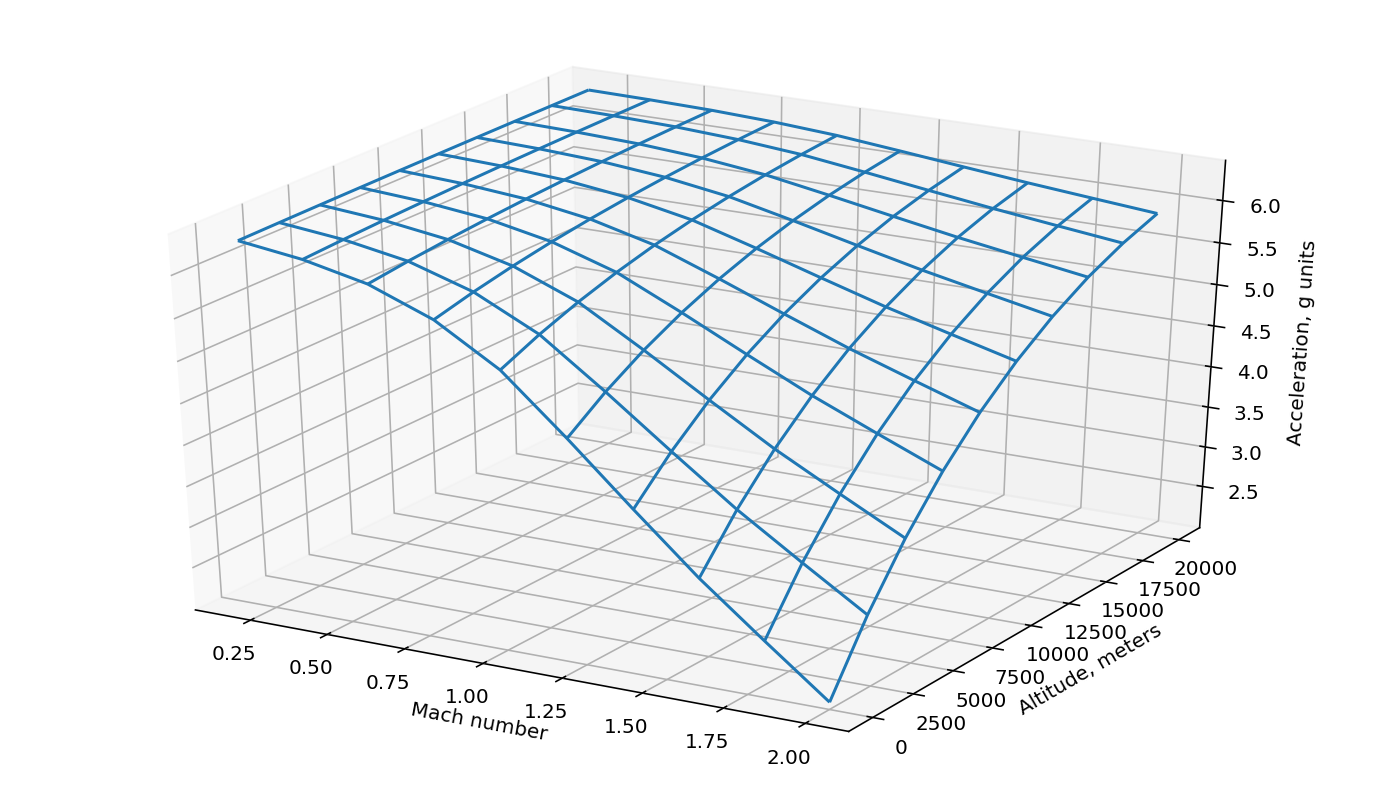

In [77]:
X = alt_plt
Y = mach_plt
X, Y = np.meshgrid(X, Y)
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
#ax.set_zlim(6, 8)
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.set_ylabel('Altitude, meters')
ax.set_xlabel('Mach number')
ax.set_zlabel('Acceleration, g units')
ax.plot_wireframe(Y, X, Z)
plt.show()